# Feature Engineering 

Feature Engineering is the process of transforming raw data into meaningful features that can be used as input for advanceced visualisations or machine learning algorithms.

It involves selecting, creating, and transforming features to hopefully enhance the dataset.

Poorly designed features can lead to a disruptive dataset. 


## Types of Feature Engineering

* **Handling Missing Values**

    Filling missing values with appropriate strategies, e.g., mean, median, or constant values.

* **Encoding Categorical Variables**

    Converting categorical data into numeric form, such as one-hot encoding or label encoding. Only needed if you are building a model

* **Binning Numeric Variables**

    Grouping continuous data into bins or categories to simplify the representation.

* **Feature Scaling**

    Scaling features to bring them to a similar range, e.g., Min-Max scaling or Standard scaling.

* **Creating New Features**

    Generating new features by combining or transforming existing ones.

* **Handling Outliers**

    Managing extreme values that can affect model performance.

* **Feature Joining**

    Creating new features by combining multiple existing features.

## Imports and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

C:\Users\josph\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score,  recall_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier



In [3]:
df = pd.read_csv("cleaned_insurance_claims_raw.csv")

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Count Blanks
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,0
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,0
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,0
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,0


### Missing Values

In [5]:
null_counts = df.isnull().sum()
null_counts

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [6]:
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace = True)

In [7]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [8]:
df = df.drop("Count Blanks", axis = 1)

In [9]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N


### Binding Numeric Data

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000
mean,203.954000,38.961000,546238.648000,1134.000000,1256.961430,1.101000e+06,501214.488000,25146.125000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52767.469880,7434.94494,7398.69451,37928.950000,2005.103000
std,115.113174,9.126378,257063.005276,610.669237,243.901644,2.297407e+06,71701.610941,27861.309026,28104.096686,6.951373,1.01888,0.820127,1.111335,26352.431456,4880.71363,4824.63479,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.000000,0.00000,0.00000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1090.567500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41962.500000,4295.00000,4445.00000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.595000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,57880.000000,6780.00000,6750.00000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70532.500000,11305.00000,10885.00000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.000000,21450.00000,23670.00000,79560.000000,2015.000000


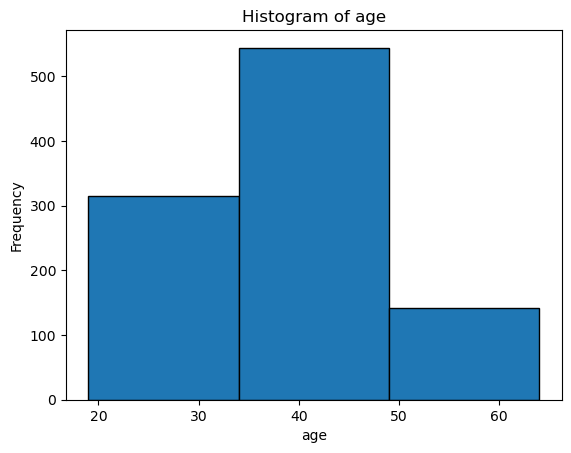

In [11]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [12]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df['ages_category'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels)

In [13]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,Middle Aged
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,Middle Aged
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,Young Adult
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,Middle Aged


In [14]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df['customer_category'] = pd.cut(df['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [15]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client


## Creating New Features

In [16]:
df["Contract Years"] = df["months_as_customer"]/12

In [17]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,6510.0,13020.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780.0,780.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,7700.0,3850.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1300.0,650.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000


## Feature Joining

In [18]:
df['total_premiums_paid'] = (df['policy_annual_premium']/12) * df['months_as_customer']

In [19]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,13020.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3850.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,650.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000


In [20]:
df['net_value_of_customer'] = df['total_premiums_paid'] - df['total_claim_amount']

In [21]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


## Saving the csv for late

In [23]:
df.to_csv('Advanced Features Claims Data.csv')

## Go wild

Go out a see what other features you can create that will be useful for our visualisations

<h3>Handling Outliers<h3>

array([[<Axes: title={'center': 'months_as_customer'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'policy_number'}>,
        <Axes: title={'center': 'policy_deductable'}>,
        <Axes: title={'center': 'policy_annual_premium'}>],
       [<Axes: title={'center': 'umbrella_limit'}>,
        <Axes: title={'center': 'insured_zip'}>,
        <Axes: title={'center': 'capital-gains'}>,
        <Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'incident_hour_of_the_day'}>],
       [<Axes: title={'center': 'number_of_vehicles_involved'}>,
        <Axes: title={'center': 'bodily_injuries'}>,
        <Axes: title={'center': 'witnesses'}>,
        <Axes: title={'center': 'total_claim_amount'}>,
        <Axes: title={'center': 'injury_claim'}>],
       [<Axes: title={'center': 'property_claim'}>,
        <Axes: title={'center': 'vehicle_claim'}>,
        <Axes: title={'center': 'auto_year'}>,
        <Axes: title={'center': 'Contract Years'}>

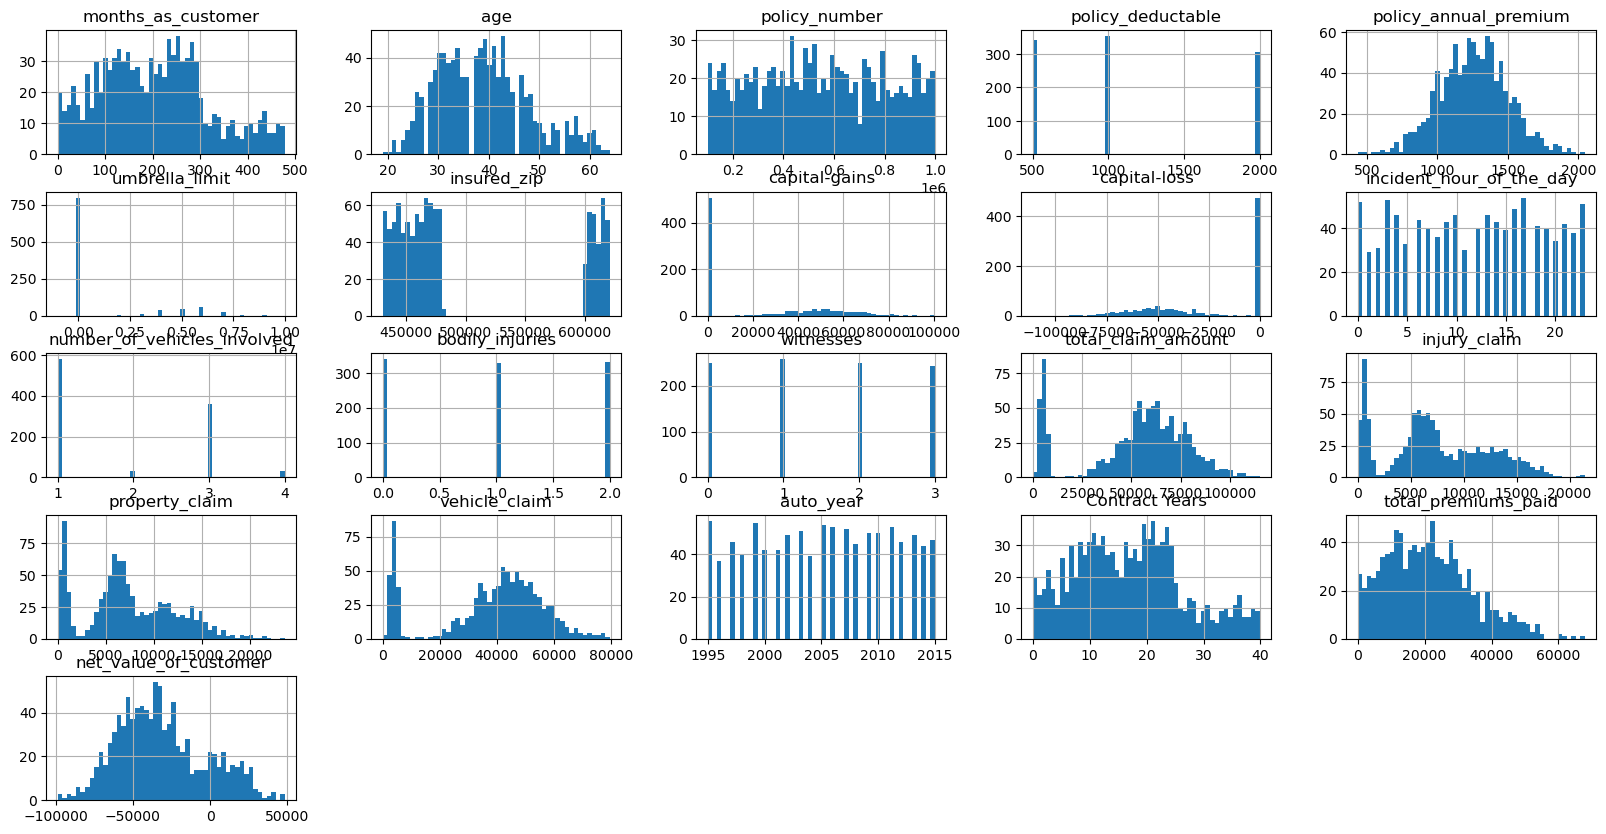

In [22]:
df.hist(bins=50, figsize = (20,10))

In [23]:
df.drop(columns =(['policy_bind_date','policy_deductable','umbrella_limit','capital-gains','capital-loss','bodily_injuries','auto_year']), axis = 1)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48,521585,OH,250/500,1406.91,466132,MALE,MD,craft-repair,...,13020.0,52080,Saab,92x,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42,342868,IN,250/500,1197.22,468176,MALE,MD,machine-op-inspct,...,780.0,3510,Mercedes,E400,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29,687698,OH,100/300,1413.14,430632,FEMALE,PhD,sales,...,3850.0,23100,Dodge,RAM,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41,227811,IL,250/500,1415.74,608117,FEMALE,PhD,armed-forces,...,6340.0,50720,Chevrolet,Tahoe,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44,367455,IL,500/1000,1583.91,610706,MALE,Associate,sales,...,650.0,4550,Accura,RSX,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1310.80,431289,FEMALE,Masters,craft-repair,...,8720.0,61040,Honda,Accord,N,Middle Aged,New Client,0.250000,327.700000,-86872.300000
996,285,41,186934,IL,100/300,1436.79,608177,FEMALE,PhD,prof-specialty,...,18080.0,72320,Volkswagen,Passat,N,Middle Aged,Long-Term Client,23.750000,34123.762500,-74356.237500
997,130,34,918516,OH,250/500,1383.49,442797,FEMALE,Masters,armed-forces,...,7500.0,52500,Suburu,Impreza,N,Middle Aged,Established Client,10.833333,14987.808333,-52512.191667
998,458,62,533940,IL,500/1000,1356.92,441714,MALE,Associate,handlers-cleaners,...,5220.0,36540,Audi,A5,N,Elderly,Long-Term Client,38.166667,51789.113333,4809.113333


<h3>Encoding Categorical Variables<h3>

In [24]:
df.select_dtypes(include=['object']).columns # checking categorcial columns


Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [25]:
df.select_dtypes(include=['category']).columns 

Index(['ages_category', 'customer_category'], dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   months_as_customer           1000 non-null   int64   
 1   age                          1000 non-null   int64   
 2   policy_number                1000 non-null   int64   
 3   policy_bind_date             1000 non-null   object  
 4   policy_state                 1000 non-null   object  
 5   policy_csl                   1000 non-null   object  
 6   policy_deductable            1000 non-null   int64   
 7   policy_annual_premium        1000 non-null   float64 
 8   umbrella_limit               1000 non-null   int64   
 9   insured_zip                  1000 non-null   int64   
 10  insured_sex                  1000 non-null   object  
 11  insured_education_level      1000 non-null   object  
 12  insured_occupation           1000 non-null   object  
 13  insu

In [27]:
from sklearn.preprocessing import LabelEncoder

categorical_col = [ 'policy_state','policy_csl','insured_education_level','collision_type','authorities_contacted','incident_state','incident_city','incident_date',
       'insured_occupation', 'insured_hobbies', 'insured_relationship', 'auto_make','incident_severity','incident_type','insured_relationship','incident_location','police_report_available',
                  'property_damage','ages_category','customer_category','auto_model']
le = LabelEncoder()

for col in categorical_col:
    df[col] = le.fit_transform(df[col])
        

In [28]:
df['fraud_reported'] = df['fraud_reported'].map( {'Y':1, 'N':0})
df['insured_sex'] = df['insured_sex'].map( {'MALE':1, 'FEMALE':0})


In [29]:
df =df.drop('policy_bind_date', axis = 1)
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,52080,10,1,2004,1,1,1,27.333333,38455.540000,-33154.460000
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,3510,8,12,2007,1,1,1,19.000000,22747.180000,17677.180000
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,23100,4,30,2007,0,2,0,11.166667,15780.063333,-18869.936667
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,50720,3,34,2014,1,1,1,21.333333,30202.453333,-33197.546667
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,4550,0,31,2009,0,1,1,19.000000,30094.290000,23594.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,61040,6,6,2006,0,1,2,0.250000,327.700000,-86872.300000
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,72320,13,28,2015,0,1,1,23.750000,34123.762500,-74356.237500
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,52500,11,19,1996,0,1,0,10.833333,14987.808333,-52512.191667
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,36540,1,5,1998,0,0,1,38.166667,51789.113333,4809.113333


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int32  
 4   policy_csl                   1000 non-null   int32  
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int64  
 10  insured_education_level      1000 non-null   int32  
 11  insured_occupation           1000 non-null   int32  
 12  insured_hobbies              1000 non-null   int32  
 13  insured_relationshi

<h3>Feature Scaling<h3>

In [31]:
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [32]:
# import scaler method from sklearn and train the model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [33]:
from sklearn.svm import SVC

#Support Vector Machine
SVMClassifier = SVC(kernel='rbf',probability=True,random_state=42, gamma='auto') 
SVMClassifier.fit(X_train, y_train) 
print("SVM Score :")
SVMClassifier.score(X_test,y_test)

SVM Score :


0.71

In [34]:
from sklearn.metrics import confusion_matrix

SVM_y_predicted = SVMClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, SVM_y_predicted)

array([[141,   4],
       [ 54,   1]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
report = classification_report(y_test, SVM_y_predicted)
print(report)

scores = cross_val_score(SVMClassifier, X, y, cv=10, scoring='accuracy')
svm_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % svm_accuracy)

              precision    recall  f1-score   support

           0       0.72      0.97      0.83       145
           1       0.20      0.02      0.03        55

    accuracy                           0.71       200
   macro avg       0.46      0.50      0.43       200
weighted avg       0.58      0.71      0.61       200

Cross-Validated Accuracy: 0.75


In [36]:


#DecisionTree
DTClassifier = DecisionTreeClassifier()
DTClassifier.fit(X_train, y_train) 

print("Decision Tree Score :")
DTClassifier.score(X_test,y_test)


Decision Tree Score :


0.755

In [37]:
DT_y_predicted = DTClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, DT_y_predicted)

array([[115,  30],
       [ 19,  36]], dtype=int64)

In [38]:
print(classification_report(y_test, DT_y_predicted))

scores = cross_val_score(DTClassifier, X, y, cv=10, scoring='accuracy')
dt_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % dt_accuracy)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       145
           1       0.55      0.65      0.60        55

    accuracy                           0.76       200
   macro avg       0.70      0.72      0.71       200
weighted avg       0.77      0.76      0.76       200

Cross-Validated Accuracy: 0.80


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Random Forest
RFClassifier = RandomForestClassifier()
RFClassifier.fit(X_train, y_train) 
print("Random Forest Score :")
RFClassifier.score(X_test,y_test)

Random Forest Score :


0.755

In [40]:
RF_y_predicted = RFClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, RF_y_predicted)

array([[135,  10],
       [ 39,  16]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report
report = classification_report(y_test, RF_y_predicted)
print(report)

scores = cross_val_score(RFClassifier, X, y, cv=10, scoring='accuracy')
rf_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % rf_accuracy)

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       145
           1       0.62      0.29      0.40        55

    accuracy                           0.76       200
   macro avg       0.70      0.61      0.62       200
weighted avg       0.73      0.76      0.72       200

Cross-Validated Accuracy: 0.78


In [42]:
#LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X_train, y_train) 
print("Linear Discriminant Analysis Score :")
lda.score(X_test,y_test)

Linear Discriminant Analysis Score :


0.72

In [43]:
lda_y_predicted = lda.predict(X_test)
report = classification_report(y_test, lda_y_predicted)
print(report)

scores = cross_val_score(lda, X, y, cv=10, scoring='accuracy')
lda_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % lda_accuracy)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       145
           1       0.49      0.31      0.38        55

    accuracy                           0.72       200
   macro avg       0.63      0.59      0.60       200
weighted avg       0.69      0.72      0.70       200

Cross-Validated Accuracy: 0.78


In [44]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train, verbose=False) 
print("XGBClassifier Score :")
model_xgb.score(X_test,y_test)

XGBClassifier Score :


0.805

In [45]:
xgboost_y_predicted = model_xgb.predict(X_test)
report = classification_report(y_test, xgboost_y_predicted)

print(report)

scores = cross_val_score(model_xgb, X, y, cv=10, scoring='accuracy')
xgb_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % xgb_accuracy)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       145
           1       0.66      0.60      0.63        55

    accuracy                           0.81       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.80      0.81      0.80       200

Cross-Validated Accuracy: 0.83


 Decision Tree  and XGBOOST model has higher probability of accurate prediction of correct class member, and gaining high level of accuracy prediction probability as compared to other models.